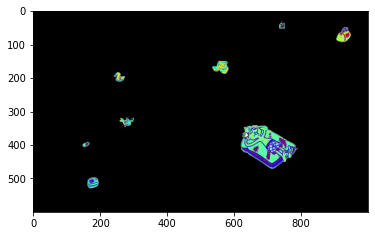

In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import cv2
import numpy as np
from skimage import measure
from imutils import contours
from PIL import Image
import imutils
def detect_differences(img1_path, img2_path, threshold=10, min_blob_size=0):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    plt.imshow(img1 -img2)

    # Convert images to grayscale and blur them
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    blurred1 = cv2.GaussianBlur(gray1, (11, 11), 0)
    blurred2 = cv2.GaussianBlur(gray2, (11, 11), 0)

    # Compute absolute difference between the images and threshold the result
    diff = cv2.absdiff(blurred1, blurred2)

    _, thresh = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh = cv2.erode(thresh, kernel, iterations=2)
    thresh = cv2.dilate(thresh, kernel, iterations=4)

    # Label and filter blobs in the thresholded image
    labels = measure.label(thresh, connectivity=2, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        if numPixels > min_blob_size:
            mask = cv2.add(mask, labelMask)

    # Find contours of the blobs and draw circles around them on the original images
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = contours.sort_contours(cnts)[0]
    for (i, c) in enumerate(cnts):
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        cv2.circle(img1, (int(cX), int(cY)), int(radius), (0, 0, 255), 3)
        cv2.circle(img2, (int(cX), int(cY)), int(radius), (0, 0, 255), 3)

    # Display the resulting images
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(300, 100))
    axes[0].imshow(img1[...,::-1])
    axes[1].imshow(img2[...,::-1])
    plt.show()

path1 = 'result.png'
path2 = 'img\img2.png'
detect_differences(path1, path2)

In [3]:
from PIL import Image, ImageChops

def spot_the_difference(path1, path2):
    img1 = Image.open(path1)
    img2 = Image.open(path2)
    
    #find the difference
    diff = ImageChops.difference(img1, img2)
    
    #show
    diff.show()

In [4]:
spot_the_difference(path1, path2)

ValueError: images do not match